In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
car_data = pd.read_csv('model_car_data.csv')

In [3]:
car_data.head()

,Unnamed: 0,car_name,model,Mileage,Year,Condition,Price
0,0,lexus,LX,21204.0,2018,Foreign Used,50015000
1,1,toyota,Camry,140309.0,2013,Foreign Used,5015000
2,2,toyota,Venza,172709.0,2013,Foreign Used,7115000
3,3,mercedes-benz,C,114936.0,2010,Foreign Used,4815000
4,4,toyota,Lexus,123938.5,2012,Foreign Used,8515000


In [4]:
car_data.drop('Unnamed: 0', axis=1, inplace = True)

In [5]:
car_data.head()

,car_name,model,Mileage,Year,Condition,Price
0,lexus,LX,21204.0,2018,Foreign Used,50015000
1,toyota,Camry,140309.0,2013,Foreign Used,5015000
2,toyota,Venza,172709.0,2013,Foreign Used,7115000
3,mercedes-benz,C,114936.0,2010,Foreign Used,4815000
4,toyota,Lexus,123938.5,2012,Foreign Used,8515000


In [6]:
car_data['car_name'].value_counts()

toyota           4414
lexus            1926
mercedes-benz    1143
honda             449
hyundai           294
nissan            243
kia               242
ford              218
acura             201
audi              147
pontiac           137
volkswagen        113
land               83
peugeot            82
mazda              68
bmw                65
mitsubishi         63
infiniti           47
chevrolet          35
volvo              24
jeep               23
dodge              23
mercedes           18
suzuki             16
chrysler           13
Name: car_name, dtype: int64

>> Observed from above, the mercedes-benz and mercedes are the same. Need to merge them together.

In [11]:
car_data[car_data['car_name'] == 'mercedes']

,car_name,model,Mileage,Year,Condition,Price
6115,mercedes,Benz,107525.0,2017,Foreign Used,31370000
6202,mercedes,Benz,133787.0,2004,Foreign Used,1697500
6250,mercedes,MI350,100485.0,2006,Nigerian Used,3594000
6264,mercedes,Benz,133433.0,2006,Foreign Used,1690000
6369,mercedes,Benz,112170.0,2011,Foreign Used,6730000
6397,mercedes,GL,147465.0,2007,Nigerian Used,3930000
6817,mercedes,benz,215613.0,2001,Foreign Used,2138000
7117,mercedes,benz,238641.0,2006,Nigerian Used,1746000
7221,mercedes,benz,7635.0,2008,Foreign Used,3370000
7274,mercedes,benz,86936.0,2006,Nigerian Used,2250000


> I would drop these rows because the model contains part of the car name. the issue will be retreated in the data cleaning process.
but will be dropped for now.

In [12]:
car_data.drop(car_data[car_data['car_name'] == 'mercedes'].index, axis = 0, inplace = True)

In [13]:
car_data.shape

(10069, 6)

In [15]:
car_data['car_name'].value_counts()

toyota           4414
lexus            1926
mercedes-benz    1143
honda             449
hyundai           294
nissan            243
kia               242
ford              218
acura             201
audi              147
pontiac           137
volkswagen        113
land               83
peugeot            82
mazda              68
bmw                65
mitsubishi         63
infiniti           47
chevrolet          35
volvo              24
jeep               23
dodge              23
suzuki             16
chrysler           13
Name: car_name, dtype: int64

> I also noticed the same issue with car_name 'land'. from my car knowledge. i know there is a car name land rover. 

> so I would also re-clean the land rover . but for now, it will be dropped for model accuracy purposes

In [16]:
car_data[car_data['car_name'] == 'land']

,car_name,model,Mileage,Year,Condition,Price
5899,land,Rover,82891.0,2006,Nigerian Used,5386000
6094,land,Rover,97332.0,2005,Nigerian Used,2026000
6132,land,Rover,127165.0,2011,Foreign Used,9754000
6169,land,Rover,151210.0,2007,Foreign Used,4490000
6182,land,Rover,65965.0,2008,Nigerian Used,5050000
...,...,...,...,...,...,...
9822,land,Rover,125156.0,2010,Nigerian Used,6770000
9834,land,Rover,89498.0,2010,Nigerian Used,2210000
9921,land,Rover,56561.0,2015,Nigerian Used,32210000
10044,land,Rover,50064.0,2010,Nigerian Used,4295000


In [19]:
car_data.drop(car_data[car_data['car_name'] == 'land'].index, axis = 0, inplace = True)

In [21]:
car_data.shape

(9986, 6)

In [22]:
car_data[car_data['Price']<0]

,car_name,model,Mileage,Year,Condition,Price


>>Handling Categorical Feature By using get_dummies function

In [23]:
from sklearn.preprocessing import LabelEncoder
df2 = car_data.copy()

# encode the categorical data
le = LabelEncoder()

df2['car_name'] = le.fit_transform(df2['car_name'].astype(str))
df2['model'] = le.fit_transform(df2['model'].astype(str))
df2['Condition'] = le.fit_transform(df2['Condition'].astype(str))

In [24]:
df2.tail()

,car_name,model,Mileage,Year,Condition,Price
10082,20,78,161088.0,2006,2,1735000
10083,16,35,67887.0,2013,2,2310000
10084,20,213,48502.0,2010,2,9210000
10085,14,311,80497.0,2005,2,3001250
10086,15,252,124776.0,2012,2,3957500


In [25]:
#car_data1 = car_data.drop(['car_name', 'model'], axis=1)

In [27]:
#df = pd.get_dummies(car_data1, drop_first=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

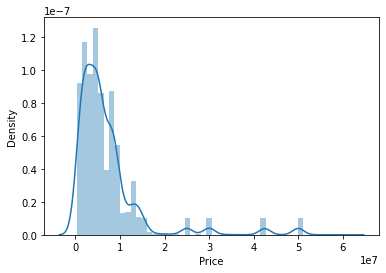

In [29]:
# we can view the distribution of price only just to get a full insight on it
sns.distplot(df2['Price'])

<AxesSubplot:>

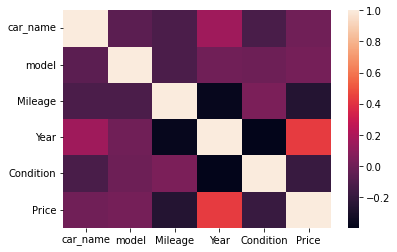

In [30]:
# we can also get the correlation of all attributes
sns.heatmap(df2.corr())